In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [43]:
df_artists = pd.read_csv('artist_cleaned.csv')
df_artists['country_code'].unique()

array(['US', 'BR', 'DE', 'GB', 'IT', 'EG', 'NG', 'AU', 'ID', 'IN', 'SA'],
      dtype=object)

## Make broader genre categories

In [7]:
df_artists['genre'].value_counts()

def group_genre(df):
    df.genre = df.genre.apply(str)
    df.genre = df.genre.apply(lambda word: 'pop' if 'pop' in word.lower() else
                                            'hip hop' if 'hip' in word.lower() else
                                            'country' if 'country' in word.lower() else
                                            'rap' if 'rap' in word.lower() else
                                            'rock' if 'rock' in word.lower() else
                                            'hip hop' if 'r&b' in word.lower() else
                                            'alternative' if 'alternative' in word.lower() else word
                             )
    return df

In [8]:
group_genre(df_artists)
df_artists['genre'].value_counts().head(3)

pop        103
hip hop     52
country     29
Name: genre, dtype: int64

## Get stage categories and artists

In [39]:
def get_genres(country):
    
    # filter by country
    country_data = df_artists[df_artists['country_code'] == country]
    
    # get value counts of each genre
    genre_counts = country_data['genre'].value_counts()
    
    # get top three genres
    top_genres = genre_counts.head(3).index.to_list()
    
    # filter by artists in the top three genres
    artist_data = country_data[country_data['genre'].isin(top_genres)]
    
    # Group by genre and sort each group by popularity (descending)
    grouped_artist_data = artist_data.groupby('genre').apply(
        lambda group: group.sort_values('popularity_rating', ascending=False))
    
    return grouped_artist_data

In [40]:
get_genres('US')

artist_id                name  popularity_rating  \
genre                                                                       
hip hop 13  1Xyo4u8uXC1ZmMpatF05PJ          The Weeknd                 96   
        4   4V8LLVI7PbaPR0K2TGSxFF  Tyler, The Creator                 95   
        14  699OTQXzgjhIYAHMy9RyPD       Playboi Carti                 90   
        7   55Aa2cqylxrFIXC767Z865           Lil Wayne                 88   
        8   20wkVLutqVOYrc0kxFs7rA       Daniel Caesar                 87   
        5   2qoQgPAilErOKCwE2Y8wOG            GloRilla                 82   
pop     2   0du5cEVh5yTK9QJze8zA0C          Bruno Mars                 96   
        9   6qqNVTkY8uBg9cP3Jd7DAH       Billie Eilish                 96   
        11  74KM79TiuVKeVCqs8QtB0B   Sabrina Carpenter                 94   
        1   1HY2Jd0NmPuamShAr6KMms           Lady Gaga                 92   
        10  1oSPZhvZMIrWW5I41kPkkY               Jimin                 89   
        15  7GlBOeep6PqTfFi59PTUUN       Chappell Roan                 89   
        16  1U1el3k54VvEUzo3ybLPlM          Kali Uchis                 86   
        23  22wbnEMDvgVIAGdFeek6ET        Benson Boone                 86   
        12  3eVa5w3URK5duf6eyVDbu9                ROSÉ                 84   
        3   1iCnM8foFssWlPRLfAbIwo          Gigi Perez                 81   
        18  3y2cIKLjiOlp1Np37WiUdH           Shaboozey                 80   
        17  67FB4n52MgexGQIG8s0yUH          Lola Young                 74   
rap     22  246dkjvS1zLTtiykXe5h60         Post Malone                 91   
        6   3DbwFQlvLxRSi2uX8mf81A           Sexyy Red                 80   

              genre country_code  
genre                             
hip hop 13  hip hop           US  
        4   hip hop           US  
        14  hip hop           US  
        7   hip hop           US  
        8   hip hop           US  
        5   hip hop           US  
pop     2       pop           US  
        9       pop           US  
        11      pop           US  
        1       pop           US  
        10      pop           US  
        15      pop           US  
        16      pop           US  
        23      pop           US  
        12      pop           US  
        3       pop           US  
        18      pop           US  
        17      pop           US  
rap     22      rap           US  
        6       rap           US

In [41]:
get_genres('EG')

artist_id               name  popularity_rating  \
genre                                                                           
alternative 127  2PM82jOCB674w4BL08zFVS    Muslim - مُسلِم                 62   
            135  2GVksDv9UpY60i4CvytrZK           Cairokee                 62   
            136  2yV4zQzvNPMyHncf60u9sr        Lella Fadda                 47   
hip hop     132  4BKC2HOGEqtYz2Xbgp9N1q               Wegz                 61   
            121  7yBuSjd5Z3w7acodk51evR             Afroto                 60   
            124  5764EiAfWT26wi1CdLcnwz             Shehab                 58   
            137  4o6vIkdmHiEXZOesrJj3KO            Abyusif                 56   
pop         139  2KjiHtx0h8tyJXbg8aYRgu         Essam Sasa                 65   
            126  5rCq30EbJ3DfZPKybGZj8F       Tamer Ashour                 64   
            131  5LtHZB7vU02HtNoOzNcVhc         Ramy Sabry                 63   
            133  6bb9VI1PpPTEmdgcgjTppX     Mohamed Hamaki                 61   
            129  5HczG7gdd89oDKY0CUyPof        Wael Jassar                 60   
            120  2KJgliIl1dMyeOMyCcnYv7       Bahaa Sultan                 59   
            134  0IiR4LJwslf6HBSdk9W3Dg             Angham                 59   
            122  5CSaIf8OAstAYE5oqQeS15     Magdy El Zahar                 58   
            138  2iToE4LH0W9zs4hVw3A7m6  Mahmoud El Leithy                 57   
            119  4IMgqWorWJUqUlbULGdoBa    Youssif Elashry                 54   
            140  5OaC42gxOxSYgfmmSxe672              Farid                 50   

                       genre country_code  
genre                                      
alternative 127  alternative           EG  
            135  alternative           EG  
            136  alternative           EG  
hip hop     132      hip hop           EG  
            121      hip hop           EG  
            124      hip hop           EG  
            137      hip hop           EG  
pop         139          pop           EG  
            126          pop           EG  
            131          pop           EG  
            133          pop           EG  
            129          pop           EG  
            120          pop           EG  
            134          pop           EG  
            122          pop           EG  
            138          pop           EG  
            119          pop           EG  
            140          pop           EG

In [44]:
get_genres('NG')

artist_id                name  \
genre                                                                       
canadian contemporary r&b 154  1Xyo4u8uXC1ZmMpatF05PJ          The Weeknd   
                          149  20wkVLutqVOYrc0kxFs7rA       Daniel Caesar   
corrido                   161  0ys2OFYzWYB5hRDLCsBqxt       Fuerza Regida   
                          160  3l9G1G9MxH6DaRhwLklaf5        Oscar Maydon   
hip hop                   145  4V8LLVI7PbaPR0K2TGSxFF  Tyler, The Creator   
                          148  55Aa2cqylxrFIXC767Z865           Lil Wayne   

                               popularity_rating                      genre  \
genre                                                                         
canadian contemporary r&b 154                 96  canadian contemporary r&b   
                          149                 87  canadian contemporary r&b   
corrido                   161                 91                    corrido   
                          160                 87                    corrido   
hip hop                   145                 95                    hip hop   
                          148                 88                    hip hop   

                              country_code  
genre                                       
canadian contemporary r&b 154           NG  
                          149           NG  
corrido                   161           NG  
                          160           NG  
hip hop                   145           NG  
                          148           NG

## Plot genres per country

In [9]:
def plot_genres(country):
    country_data = df_artists[df_artists['country_code'] == country]
    genre_counts = country_data['genre'].value_counts()
    
    sns.set(style="ticks")
    
    plt.figure(figsize = (7,4))
    plt.title(f"{country} Top Genres")
    ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Greens")
    sns.despine()
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    plt.ylabel('Artist Count')
    filename = f"genres_{country}.png"
    plt.savefig(filename, transparent=True, bbox_inches='tight', dpi=300)

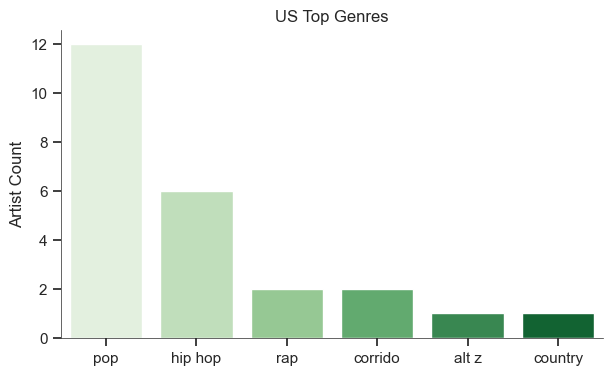

In [10]:
plot_genres('US')

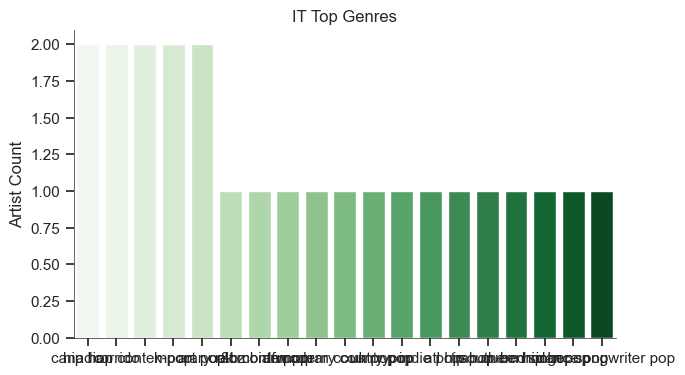

In [48]:
plot_genres('IT')

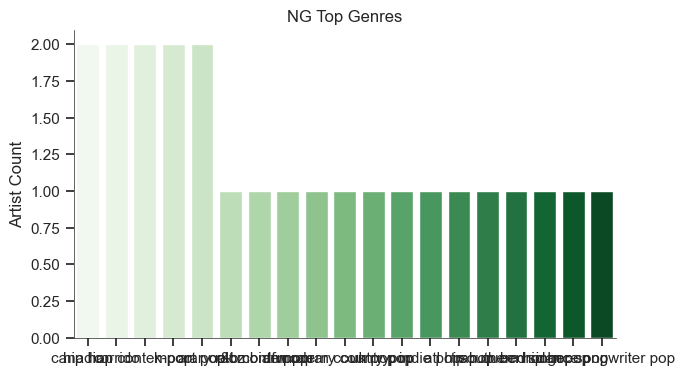

In [46]:
plot_genres('NG')